#AI BootCamp Cohort02, 03 August, 2024
#Data Cleaning Exercise (BootCamp FP)
#Muhammad Haris, h4harris@gmail.com, +92-345-5015592
IDE # Google Colab (2024-06-18)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display


In [ ]:
# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')                           #mounting my google drive on colab

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Classroom/watch8/"                 #checking directory under watch8 folder

export_Aug_2024.xml
export_cda_May_2024.xml
export_csv_Aug_2_2024.csv
export_May_2024.xml
export.zip
geotagged_pics
Haris_iPhone_pro_2_08_2024_native_dump_export.zip
Haris_iPhone_pro_2_08_2024_native_dump_passthrough_export.csv
hr.csv
steps.csv
test2.csv
test.csv
walk_run_s.csv
workout-routes


In [ ]:
# create element tree object
tree = ET.parse('/content/drive/My Drive/Classroom/watch8/export_Aug_2024.xml')
# create element tree object tree = ET.parse('apple_health_HARIS_export/export.xml')
# create element tree object
tree = ET.parse('/content/drive/My Drive/Classroom/watch8/export_Aug_2024.xml')

 help taken from https://docs.python.org/3/library/xml.etree.elementtree.html

 help taken from IOS API documentation, support.apple.com , discussions.apple.com

In [ ]:
# extract the attributes of health record
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]
record_list

[{'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Haris’s iPhone',
  'sourceVersion': '16.3.1',
  'unit': 'cm',
  'creationDate': '2023-03-10 23:50:30 +0500',
  'startDate': '2023-03-10 23:50:30 +0500',
  'endDate': '2023-03-10 23:50:30 +0500',
  'value': '167.64'},
 {'type': 'HKQuantityTypeIdentifierHeight',
  'sourceName': 'Health',
  'sourceVersion': '10.3.1',
  'unit': 'cm',
  'creationDate': '2017-04-28 12:00:41 +0500',
  'startDate': '2017-04-28 12:00:41 +0500',
  'endDate': '2017-04-28 12:00:41 +0500',
  'value': '166'},
 {'type': 'HKQuantityTypeIdentifierBodyMass',
  'sourceName': 'Haris’s iPhone',
  'sourceVersion': '16.4.1',
  'unit': 'kg',
  'creationDate': '2023-05-26 10:59:57 +0500',
  'startDate': '2023-05-26 10:59:57 +0500',
  'endDate': '2023-05-26 10:59:57 +0500',
  'value': '73.9356'},
 {'type': 'HKQuantityTypeIdentifierBodyMass',
  'sourceName': 'Health',
  'sourceVersion': '10.3.1',
  'unit': 'kg',
  'creationDate': '2017-04-28 12:00:41 +0500',
  'startDa

In [ ]:
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)
# print the information of record_data
print(record_data.info())
# show the record_data DataFrame
display(record_data)
# create a DataFrame from record_list record_data = pd.DataFrame(record_list) # print the information of record_data print(record_data.info()) # show the record_data DataFrame display(record_data)
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)

# print the information of record_data
print(record_data.info())

# show the record_data DataFrame
display(record_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB
None


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,Haris’s iPhone,16.3.1,cm,2023-03-10 23:50:30 +0500,2023-03-10 23:50:30 +0500,2023-03-10 23:50:30 +0500,167.64,NaN
1,HKQuantityTypeIdentifierHeight,Health,10.3.1,cm,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,166,NaN
2,HKQuantityTypeIdentifierBodyMass,Haris’s iPhone,16.4.1,kg,2023-05-26 10:59:57 +0500,2023-05-26 10:59:57 +0500,2023-05-26 10:59:57 +0500,73.9356,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,10.3.1,kg,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,80,NaN
4,HKQuantityTypeIdentifierHeartRate,Haris’s Apple Watch,9.5,count/min,2023-05-26 14:05:48 +0500,2023-05-26 14:02:32 +0500,2023-05-26 14:02:32 +0500,80,"<<HKDevice: 0x301da2f80>, name:Apple Watch, ma..."
...,...,...,...,...,...,...,...,...,...
1139261,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-04-16 19:28:03 +0500,2024-04-16 19:27:02 +0500,2024-04-16 19:28:02 +0500,50.1356,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139262,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-05-03 08:28:28 +0500,2024-05-03 08:27:27 +0500,2024-05-03 08:28:26 +0500,68.0076,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139263,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-05-31 13:08:08 +0500,2024-05-31 13:07:07 +0500,2024-05-31 13:07:27 +0500,53.8915,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139264,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-06-09 20:20:48 +0500,2024-06-09 20:19:47 +0500,2024-06-09 20:20:47 +0500,32.06,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB
None


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,Haris’s iPhone,16.3.1,cm,2023-03-10 23:50:30 +0500,2023-03-10 23:50:30 +0500,2023-03-10 23:50:30 +0500,167.64,NaN
1,HKQuantityTypeIdentifierHeight,Health,10.3.1,cm,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,166,NaN
2,HKQuantityTypeIdentifierBodyMass,Haris’s iPhone,16.4.1,kg,2023-05-26 10:59:57 +0500,2023-05-26 10:59:57 +0500,2023-05-26 10:59:57 +0500,73.9356,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,10.3.1,kg,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,2017-04-28 12:00:41 +0500,80,NaN
4,HKQuantityTypeIdentifierHeartRate,Haris’s Apple Watch,9.5,count/min,2023-05-26 14:05:48 +0500,2023-05-26 14:02:32 +0500,2023-05-26 14:02:32 +0500,80,"<<HKDevice: 0x301da2f80>, name:Apple Watch, ma..."
...,...,...,...,...,...,...,...,...,...
1139261,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-04-16 19:28:03 +0500,2024-04-16 19:27:02 +0500,2024-04-16 19:28:02 +0500,50.1356,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139262,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-05-03 08:28:28 +0500,2024-05-03 08:27:27 +0500,2024-05-03 08:28:26 +0500,68.0076,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139263,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-05-31 13:08:08 +0500,2024-05-31 13:07:07 +0500,2024-05-31 13:07:27 +0500,53.8915,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."
1139264,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.4,ms,2024-06-09 20:20:48 +0500,2024-06-09 20:19:47 +0500,2024-06-09 20:20:47 +0500,32.06,"<<HKDevice: 0x301da0eb0>, name:Apple Watch, ma..."


In [ ]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   type           1139266 non-null  object
 1   sourceName     1139266 non-null  object
 2   sourceVersion  1139266 non-null  object
 3   unit           1132508 non-null  object
 4   creationDate   1139266 non-null  object
 5   startDate      1139266 non-null  object
 6   endDate        1139266 non-null  object
 7   value          1139266 non-null  object
 8   device         1020675 non-null  object
dtypes: object(9)
memory usage: 78.2+ MB


In [ ]:
record_data.describe()         # basic EDA's

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
count,1139266,1139266,1139266,1132508,1139266,1139266,1139266,1139266,1020675
unique,41,4,112,17,365138,614975,617260,174895,3640
top,HKQuantityTypeIdentifierActiveEnergyBurned,Haris’s Apple Watch,10.4,kcal,2024-03-27 16:20:08 +0500,2024-06-04 18:10:00 +0500,2024-05-30 18:05:00 +0500,0.068,"<<HKDevice: 0x301e88050>, name:Apple Watch, ma..."
freq,206891,758781,220374,325749,1465,12,12,54343,4938


In [ ]:
record_data.isnull().sum()       # basic EDA's

,0
type,0
sourceName,0
sourceVersion,0
unit,6758
creationDate,0
startDate,0
endDate,0
value,0
device,118591


In [ ]:
record_data.shape      # basic EDA's

(1139266, 9)

In [ ]:
len(record_data.columns)     # basic EDA's

9

In [ ]:
record_data.count()          # basic EDA's

,0
type,1139266
sourceName,1139266
sourceVersion,1139266
unit,1132508
creationDate,1139266
startDate,1139266
endDate,1139266
value,1139266
device,1020675


In [ ]:
record_data.columns.shape          # basic EDA's

(9,)

In [ ]:
record_data.describe               # basic EDA's

<bound method NDFrame.describe of                                                      type  \
0                          HKQuantityTypeIdentifierHeight   
1                          HKQuantityTypeIdentifierHeight   
2                        HKQuantityTypeIdentifierBodyMass   
3                        HKQuantityTypeIdentifierBodyMass   
4                       HKQuantityTypeIdentifierHeartRate   
...                                                   ...   
1139261  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139262  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139263  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139264  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   
1139265  HKQuantityTypeIdentifierHeartRateVariabilitySDNN   

                  sourceName sourceVersion       unit  \
0             Haris’s iPhone        16.3.1         cm   
1                     Health        10.3.1         cm   
2             Haris’s iPhone        16.4.1         kg   
3                     Health        10.3.1         kg   
4        Haris’s Apple Watch           9.5  count/min   
...                      ...           ...        ...   
1139261  Haris’s Apple Watch          10.4         ms   
1139262  Haris’s Apple Watch          10.4         ms   
1139263  Haris’s Apple Watch          10.4         ms   
1139264  Haris’s Apple Watch          10.4         ms   
1139265  Haris’s Apple Watch          10.5         ms   

                      creationDate                  startDate  \
0        2023-03-10 23:50:30 +0500  2023-03-10 23:50:30 +0500   
1        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
2        2023-05-26 10:59:57 +0500  2023-05-26 10:59:57 +0500   
3        2017-04-28 12:00:41 +0500  2017-04-28 12:00:41 +0500   
4        2023-05-26 14:05:48 +0500  2023-05-26 14:02:32 +0500   
...                            ...                        ...   
1139261  2024-04-16 19:28:03 +0500  2024-04-16 19:27:02 +0500   
1139262  2024-05-03 08:28:28 +0500  2024-05-03 08:27:27 +0500   
1139263  2024-05-31 13:08:08 +0500  2024-05-31 13:07:07 +0500   
1139264  2024-06-09 20:20:48 +0500  2024-06-09 20:19:47 +0500   
1139265  2024-06-28 11:27:15 +0500  2024-06-28 11:26:14 +0500   

                           endDate    value  \
0        2023-03-10 23:50:30 +0500   167.64   
1        2017-04-28 12:00:41 +0500      166   
2        2023-05-26 10:59:57 +0500  73.9356   
3        2017-04-28 12:00:41 +0500       80   
4        2023-05-26 14:02:32 +0500       80   
...                            ...      ...   
1139261  2024-04-16 19:28:02 +0500  50.1356   
1139262  2024-05-03 08:28:26 +0500  68.0076   
1139263  2024-05-31 13:07:27 +0500  53.8915   
1139264  2024-06-09 20:20:47 +0500    32.06   
1139265  2024-06-28 11:27:13 +0500  71.6487   

                                                    device  
0                                                      NaN  
1                                                      NaN  
2                                                      NaN  
3                                                      NaN  
4        <<HKDevice: 0x301da2f80>, name:Apple Watch, ma...  
...                                                    ...  
1139261  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139262  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139263  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139264  <<HKDevice: 0x301da0eb0>, name:Apple Watch, ma...  
1139265  <<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma...  

[1139266 rows x 9 columns]>

In [ ]:
record_data.dtypes     ############################################################### conversion needed  !!!!!!!!!!!!!!!!!!!

,0
type,object
sourceName,object
sourceVersion,object
unit,object
creationDate,object
startDate,object
endDate,object
value,object
device,object


In [ ]:
# unique elements in 'type' column of record_data
record_data.type.unique()
# unique elements in 'type' column of record_data record_data.type.unique()
# unique elements in 'type' column of record_data
record_data.type.unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierOxygenSaturation',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDo

 exploring all UID's and will use activities type those are of my interest, few willreturn NaN because i never used those

In [ ]:
record_data.tail(1)

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1139265,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Haris’s Apple Watch,10.5,ms,2024-06-28 11:27:15 +0500,2024-06-28 11:26:14 +0500,2024-06-28 11:27:13 +0500,71.6487,"<<HKDevice: 0x301dbf2a0>, name:Apple Watch, ma..."


In [ ]:
record_data['type']=record_data['type'].astype('category')

In [ ]:
record_data['sourceName']=record_data['sourceName'].astype('category')

In [ ]:
record_data['device']=record_data['device'].astype('category')

In [ ]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   type           1139266 non-null  category
 1   sourceName     1139266 non-null  category
 2   sourceVersion  1139266 non-null  object  
 3   unit           1132508 non-null  object  
 4   creationDate   1139266 non-null  object  
 5   startDate      1139266 non-null  object  
 6   endDate        1139266 non-null  object  
 7   value          1139266 non-null  object  
 8   device         1020675 non-null  category
dtypes: category(3), object(6)
memory usage: 56.7+ MB


In [ ]:
record_data_cleaned = record_data.drop(['sourceName','sourceVersion', 'device', 'creationDate','endDate'], axis=1)
# transform 'startDate' into date format
# record_data['startDate'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Day'] = pd.to_datetime(record_data['startDate']).dt.strftime('%A')
record_data_cleaned['Date'] = pd.to_datetime(record_data['startDate']).dt.strftime('%Y-%m-%d')
record_data_cleaned['Month'] = pd.to_datetime(record_data['startDate']).dt.strftime('%B')
# value is numeric, NaN if fails
record_data_cleaned['value'] = pd.to_numeric(record_data['value'], errors='coerce')
# shorter observation names
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data_cleaned['type'] = record_data_cleaned['type'].str.replace('HKCategoryTypeIdentifier', '')

In [ ]:
record_data_cleaned.tail(1)

,type,unit,startDate,value,Day,Date,Month
1139265,HeartRateVariabilitySDNN,ms,2024-06-28 11:26:14 +0500,71.6487,Friday,2024-06-28,June


In [ ]:
record_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   type    1139266 non-null  object 
 1   Date    1139266 non-null  object 
 2   Day     1139266 non-null  object 
 3   Month   1139266 non-null  object 
 4   value   1132508 non-null  float64
 5   unit    1132508 non-null  object 
dtypes: float64(1), object(5)
memory usage: 52.2+ MB


In [ ]:
record_data_cleaned = record_data_cleaned[['type', 'Date','Day', 'Month','value','unit']]

In [ ]:
record_data_cleaned.tail(1)

,type,Date,Day,Month,value,unit
1139265,HeartRateVariabilitySDNN,2024-06-28,Friday,June,71.6487,ms


In [ ]:
record_data_cleaned['Date'] = pd.to_datetime(record_data_cleaned['Date'])

In [ ]:
record_data_cleaned.tail(1)

,type,Date,Day,Month,value,unit
1139265,HeartRateVariabilitySDNN,2024-06-28,Friday,June,71.6487,ms


In [ ]:
record_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139266 entries, 0 to 1139265
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   type    1139266 non-null  object        
 1   Date    1139266 non-null  datetime64[ns]
 2   Day     1139266 non-null  object        
 3   Month   1139266 non-null  object        
 4   value   1132508 non-null  float64       
 5   unit    1132508 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 52.2+ MB


In [ ]:
record_data_cleaned.unit.unique()

array(['cm', 'kg', 'count/min', '%', 'count', 'km', 'kcal', 'min', 'm',
       'mL/min·kg', 'dBASPL', 'km/hr', 'm/s', 'hr', 'ms', 'W',
       'kcal/hr·kg', nan], dtype=object)

In [ ]:
record_data_cleaned['type']=record_data_cleaned['type'].astype('category')

In [ ]:
record_data_cleaned["type_cat"] = record_data_cleaned["type"].cat.codes
record_data_cleaned.head()

,type,Date,Day,Month,value,unit,type_cat
0,Height,2023-03-10,Friday,March,167.6400,cm,18
1,Height,2017-04-28,Friday,April,166.0000,cm,18
2,BodyMass,2023-05-26,Friday,May,73.9356,kg,7
3,BodyMass,2017-04-28,Friday,April,80.0000,kg,7
4,HeartRate,2023-05-26,Friday,May,80.0000,count/min,15


In [ ]:
record_data_cleaned_qa = record_data_cleaned.drop(['type','Day', 'Month', 'unit'], axis=1)

In [ ]:
record_data_cleaned_qa.tail(2)

,Date,value,type_cat
1139264,2024-06-09,32.0600,17
1139265,2024-06-28,71.6487,17


In [ ]:
qa=record_data_cleaned_qa.corr()

In [ ]:
qa = qa.drop(['Date'], axis=1)

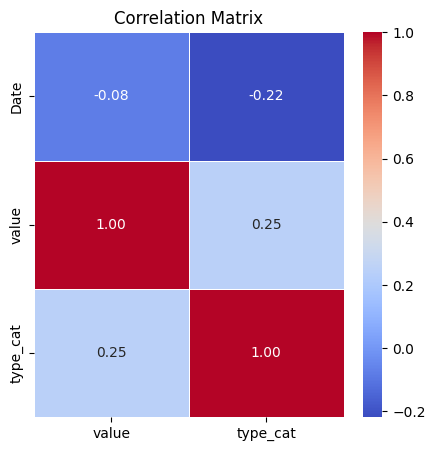

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(qa, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into train and test
a = qa.drop('value', axis=1)
b = qa['value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report